In [59]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 30)

# EDA - Covid Totals

In [60]:
covidtotals = pd.read_csv("https://github.com/PacktPublishing/Python-Data-Cleaning-Cookbook/raw/master/Chapter04/data/covidtotals.csv",
                              parse_dates=['lastdate']
                         )
covidtotals

,iso_code,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
0,AFG,2020-06-01,Afghanistan,15205,257,390.59,6.60,"38,928,341.00",54.42,18.60,"1,803.99",0.50
1,ALB,2020-06-01,Albania,1137,33,395.09,11.47,"2,877,800.00",104.87,38.00,"11,803.43",2.89
2,DZA,2020-06-01,Algeria,9394,653,214.22,14.89,"43,851,043.00",17.35,29.10,"13,913.84",1.90
3,AND,2020-06-01,Andorra,764,51,"9,888.05",660.07,"77,265.00",163.75,NaN,NaN,NaN
4,AGO,2020-06-01,Angola,86,4,2.62,0.12,"32,866,268.00",23.89,16.80,"5,819.49",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
205,VNM,2020-06-01,Vietnam,328,0,3.37,0.00,"97,338,583.00",308.13,32.60,"6,171.88",2.60
206,ESH,2020-06-01,Western Sahara,23,1,38.51,1.67,"597,330.00",NaN,28.40,NaN,NaN
207,YEM,2020-06-01,Yemen,323,80,10.83,2.68,"29,825,968.00",53.51,20.30,"1,479.15",0.70
208,ZMB,2020-06-01,Zambia,1057,7,57.50,0.38,"18,383,956.00",23.00,17.70,"3,689.25",2.00


In [61]:
# check index candidate
covidtotals['iso_code'].nunique()
print()
covidtotals['iso_code'].count()

210

210

In [62]:
covidtotals.set_index("iso_code", inplace=True)
covidtotals.head(5)

,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
iso_code,,,,,,,,,,,
AFG,2020-06-01,Afghanistan,15205,257,390.59,6.60,"38,928,341.00",54.42,18.60,"1,803.99",0.50
ALB,2020-06-01,Albania,1137,33,395.09,11.47,"2,877,800.00",104.87,38.00,"11,803.43",2.89
DZA,2020-06-01,Algeria,9394,653,214.22,14.89,"43,851,043.00",17.35,29.10,"13,913.84",1.90
AND,2020-06-01,Andorra,764,51,"9,888.05",660.07,"77,265.00",163.75,NaN,NaN,NaN
AGO,2020-06-01,Angola,86,4,2.62,0.12,"32,866,268.00",23.89,16.80,"5,819.49",NaN


In [63]:
covidtotals.shape

(210, 11)

In [64]:
covidtotals.sample(2)

,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
iso_code,,,,,,,,,,,
AIA,2020-06-01,Anguilla,3,0,199.97,0.00,"15,002.00",NaN,NaN,NaN,NaN
MUS,2020-06-01,Mauritius,335,10,263.41,7.86,"1,271,767.00",622.96,37.40,"20,292.74",3.40


In [65]:
covidtotals.sample(2, random_state=1990)

,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
iso_code,,,,,,,,,,,
CRI,2020-06-01,Costa Rica,1056,10,207.30,1.96,"5,094,114.00",96.08,33.60,"15,525.00",1.13
BDI,2020-06-01,Burundi,63,1,5.30,0.08,"11,890,781.00",423.06,17.50,702.23,0.80


In [66]:
# notice the distribution of total cases
covidtotals.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
count,210.00,210.00,210.00,210.00,210.00,198.00,186.00,182.00,164.00
mean,"29,216.14","1,770.71","1,355.36",55.66,"36,942,762.36",362.87,30.63,"19,539.15",3.01
std,"136,397.80","8,705.57","2,625.28",144.79,"142,509,205.13","1,581.44",9.13,"19,862.35",2.46
min,0.00,0.00,0.00,0.00,809.00,0.14,15.10,661.24,0.10
25%,175.75,4.00,92.54,0.88,"1,031,042.50",37.42,22.25,"4,485.33",1.30
50%,"1,242.50",25.50,280.93,6.15,"6,909,866.00",87.25,30.25,"13,183.08",2.36
75%,"10,117.00",241.25,"1,801.39",31.78,"26,158,676.50",214.12,39.00,"28,556.53",3.90
max,"1,790,191.00","104,383.00","19,771.35","1,237.55","1,439,323,774.00","19,347.50",48.20,"116,935.60",13.80


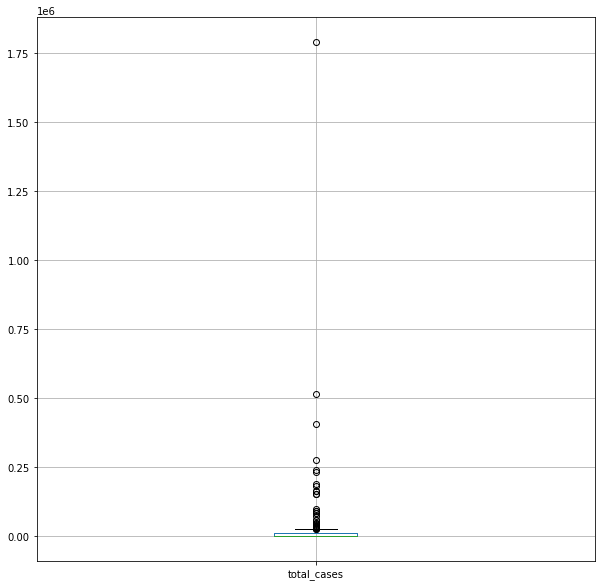

In [67]:
plt.figure(figsize=(10,10))
covidtotals.boxplot(column=['total_cases']);

In [68]:
covidtotals.shape
covidtotals.sample(3, random_state=1)
covidtotals.dtypes

(210, 11)

,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
iso_code,,,,,,,,,,,
COG,2020-06-01,Congo,611,20,110.73,3.62,"5,518,092.00",15.40,19.00,"4,881.41",NaN
THA,2020-06-01,Thailand,3081,57,44.14,0.82,"69,799,978.00",135.13,40.10,"16,277.67",2.10
CZE,2020-06-01,Czech Republic,9273,320,865.91,29.88,"10,708,982.00",137.18,43.30,"32,605.91",6.63


lastdate           datetime64[ns]
location                   object
total_cases                 int64
total_deaths                int64
total_cases_pm            float64
total_deaths_pm           float64
population                float64
pop_density               float64
median_age                float64
gdp_per_capita            float64
hosp_beds                 float64
dtype: object

In [69]:
totvars = ['location','total_cases','total_deaths','total_cases_pm','total_deaths_pm']
covidtotals[totvars]

,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm
iso_code,,,,,
AFG,Afghanistan,15205,257,390.59,6.60
ALB,Albania,1137,33,395.09,11.47
DZA,Algeria,9394,653,214.22,14.89
AND,Andorra,764,51,"9,888.05",660.07
AGO,Angola,86,4,2.62,0.12
...,...,...,...,...,...
VNM,Vietnam,328,0,3.37,0.00
ESH,Western Sahara,23,1,38.51,1.67
YEM,Yemen,323,80,10.83,2.68


Let's review the documentation about DataFrame quantile

*  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html


In [70]:
np.arange(0.0, 1.1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [71]:
covidtotals[totvars].quantile(np.arange(0.0, 1.1, 0.1))

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
0.00,0.00,0.00,0.00,0.00
0.10,22.90,0.00,18.00,0.00
0.20,105.20,2.00,56.29,0.38
0.30,302.00,6.70,115.43,1.72
0.40,762.00,12.00,213.97,3.96
0.50,"1,242.50",25.50,280.93,6.15
0.60,"2,514.60",54.60,543.96,12.25
0.70,"6,959.80",137.20,"1,071.24",25.95
0.80,"16,847.20",323.20,"2,206.30",49.97
0.90,"46,513.10","1,616.90","3,765.14",138.90


In [72]:
covidtotals[totvars].quantile(np.arange(0.0, 1.05, 0.05))

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
0.00,0.00,0.00,0.00,0.00
0.05,13.00,0.00,8.30,0.00
0.10,22.90,0.00,18.00,0.00
0.15,48.95,1.00,39.34,0.10
0.20,105.20,2.00,56.29,0.38
0.25,175.75,4.00,92.54,0.88
0.30,302.00,6.70,115.43,1.72
0.35,461.75,9.15,181.41,3.01
0.40,762.00,12.00,213.97,3.96
0.45,994.85,19.05,244.23,5.10


(array([202.,   5.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.    ,  179.0191,  358.0382,  537.0573,  716.0764,  895.0955,
        1074.1146, 1253.1337, 1432.1528, 1611.1719, 1790.191 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Total COVID cases (per 1000)')

Text(0.5, 0, 'Cases')

Text(0, 0.5, 'Num countries')

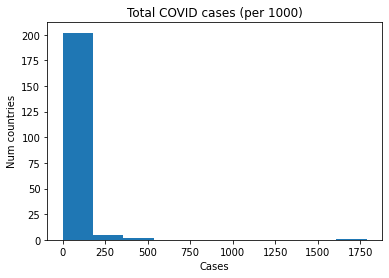

In [73]:
plt.hist(covidtotals['total_cases']/1000, bins=10)
plt.title('Total COVID cases (per 1000)')
plt.xlabel('Cases')
plt.ylabel("Num countries")
plt.show()

# Statmodel library Demo on covidtotals dataset 

In [74]:
totvars = ['location','total_cases','total_deaths','total_cases_pm','total_deaths_pm']
demovars = ['population','pop_density','median_age','gdp_per_capita', 'hosp_beds']

In [75]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqline
import scipy.stats as scistat

In [76]:
totvars = ['location','total_cases','total_deaths','total_cases_pm','total_deaths_pm']
covidtotalsonly = covidtotals.loc[:, totvars]
covidtotalsonly

,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm
iso_code,,,,,
AFG,Afghanistan,15205,257,390.59,6.60
ALB,Albania,1137,33,395.09,11.47
DZA,Algeria,9394,653,214.22,14.89
AND,Andorra,764,51,"9,888.05",660.07
AGO,Angola,86,4,2.62,0.12
...,...,...,...,...,...
VNM,Vietnam,328,0,3.37,0.00
ESH,Western Sahara,23,1,38.51,1.67
YEM,Yemen,323,80,10.83,2.68


In [77]:
covidtotalsonly.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
count,210.00,210.00,210.00,210.00
mean,"29,216.14","1,770.71","1,355.36",55.66
std,"136,397.80","8,705.57","2,625.28",144.79
min,0.00,0.00,0.00,0.00
25%,175.75,4.00,92.54,0.88
50%,"1,242.50",25.50,280.93,6.15
75%,"10,117.00",241.25,"1,801.39",31.78
max,"1,790,191.00","104,383.00","19,771.35","1,237.55"


Pandas skew function

*   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html



In [78]:
# a higher number indicates a higher level of skew
# skew value of zero means perfectly normal distribution 
covidtotalsonly.skew()

<ipython-input-78-f316948dade4>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  covidtotalsonly.skew()


total_cases       10.80
total_deaths       8.93
total_cases_pm     4.40
total_deaths_pm    4.67
dtype: float64

Pandas Kurtosis function

*   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.kurtosis.html
*   https://en.wikipedia.org/wiki/Kurtosis

It is a measure of the "tail" of the distribution





In [79]:
covidtotalsonly.kurtosis()

<ipython-input-79-1c233c58843b>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  covidtotalsonly.kurtosis()


total_cases       134.98
total_deaths       95.74
total_cases_pm     25.24
total_deaths_pm    27.24
dtype: float64


Shapiro test for normality
*   https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test


P-Values
*   https://en.wikipedia.org/wiki/P-value

Low P valus lead us to reject the null hypothesis

In Shapiro, the null hypothesis is that the distribution is normal

A small p value would lead us to conclude that the distribution is not normal

In [80]:
def testnorm(var, df):
    stat, p = scistat.shapiro(df[var])
    return p

In [81]:
# notice the small P value
testnorm("total_cases", covidtotalsonly)

3.753789128593843e-29

In [82]:
testnorm("total_deaths", covidtotalsonly)

4.3427896631016077e-29

In [83]:
testnorm("total_cases_pm", covidtotalsonly)

1.3972683006509067e-23

In [84]:
testnorm("total_deaths_pm", covidtotalsonly)

1.361060423265974e-25

In [85]:
# identify countries with zero deaths
# notice the number of total_cases
covidtotalsonly.loc[covidtotalsonly.total_deaths_pm == 0]

,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm
iso_code,,,,,
AIA,Anguilla,3,0,199.97,0.00
BTN,Bhutan,43,0,55.73,0.00
BES,Bonaire Sint Eustatius and Saba,7,0,266.96,0.00
KHM,Cambodia,125,0,7.48,0.00
DMA,Dominica,16,0,222.25,0.00
ERI,Eritrea,39,0,11.00,0.00
FRO,Faeroe Islands,187,0,"3,826.87",0.00
FLK,Falkland Islands,13,0,"3,732.41",0.00
FJI,Fiji,18,0,20.08,0.00


IQR for outliers

*   https://en.wikipedia.org/wiki/Interquartile_range


In [86]:
# B/c not Normal, use IQR for outliers
thirdQ = covidtotalsonly.total_cases.quantile(0.75)
firstQ = covidtotalsonly.total_cases.quantile(0.25)

outlierRange = 1.5*(thirdQ - firstQ)

In [87]:
outlierHigh = thirdQ + outlierRange
outlierHigh

25028.875

In [88]:
lowoutlier = firstQ - outlierRange
lowoutlier

-14736.125

## Check correlations

Pearson Correlation Coefficient

*   https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [89]:
covidtotals.corr(method="pearson")

,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
total_cases,1.00,0.93,0.18,0.25,0.27,-0.03,0.16,0.19,0.03
total_deaths,0.93,1.00,0.18,0.39,0.21,-0.03,0.21,0.20,0.02
total_cases_pm,0.18,0.18,1.00,0.59,-0.06,0.11,0.31,0.65,0.08
total_deaths_pm,0.25,0.39,0.59,1.00,-0.01,0.03,0.39,0.38,0.12
population,0.27,0.21,-0.06,-0.01,1.00,-0.02,0.02,-0.06,-0.04
pop_density,-0.03,-0.03,0.11,0.03,-0.02,1.00,0.18,0.32,0.31
median_age,0.16,0.21,0.31,0.39,0.02,0.18,1.00,0.65,0.66
gdp_per_capita,0.19,0.20,0.65,0.38,-0.06,0.32,0.65,1.00,0.30
hosp_beds,0.03,0.02,0.08,0.12,-0.04,0.31,0.66,0.30,1.00


**Do you see any highly correlated variables?  Do these correlations make sense?**


*   

*   
*   

*   



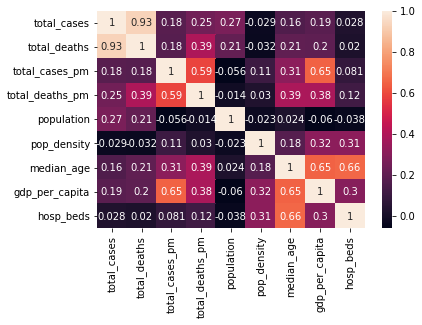

In [90]:
sns.heatmap(covidtotals.corr(method="pearson"), annot=True)

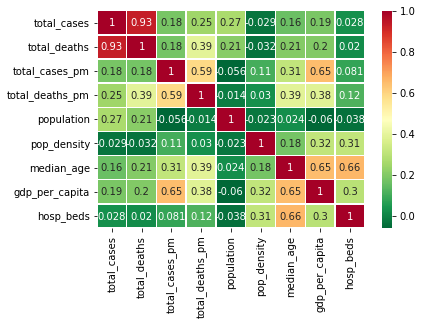

In [91]:
sns.heatmap(covidtotals.corr(method="pearson"), cmap='RdYlGn_r', linewidths=0.5, annot=True)

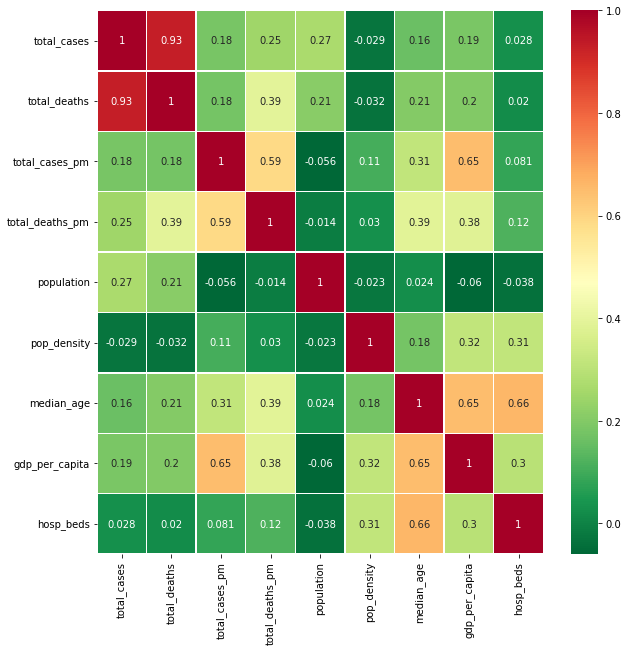

In [92]:
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(covidtotals.corr(method="pearson"), cmap='RdYlGn_r', linewidths=0.5, annot=True)

In [93]:
covidtotalsonly = covidtotals.loc[:, totvars]
covidtotalsonly

,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm
iso_code,,,,,
AFG,Afghanistan,15205,257,390.59,6.60
ALB,Albania,1137,33,395.09,11.47
DZA,Algeria,9394,653,214.22,14.89
AND,Andorra,764,51,"9,888.05",660.07
AGO,Angola,86,4,2.62,0.12
...,...,...,...,...,...
VNM,Vietnam,328,0,3.37,0.00
ESH,Western Sahara,23,1,38.51,1.67
YEM,Yemen,323,80,10.83,2.68



**qcut** help you take a continuous features and convert it to categorical. This is also known as "discretizing variables"

*   https://pandas.pydata.org/docs/reference/api/pandas.qcut.html




In [94]:
covidtotalsonly['total_cases_q'] = pd.qcut(covidtotalsonly['total_cases'],
                                          labels = ['very low', 'low', 'medium', 'high', 'very high']
                                          , q = 5)

covidtotalsonly['total_deaths_q'] = pd.qcut(covidtotalsonly['total_deaths'],
                                          labels = ['very low', 'low', 'medium', 'high', 'very high']
                                          , q = 5)

In [95]:
pd.crosstab(covidtotalsonly.total_cases_q, covidtotalsonly.total_deaths_q)

total_deaths_q,very low,low,medium,high,very high
total_cases_q,,,,,
very low,34,7,1,0,0
low,12,19,10,1,0
medium,1,13,15,13,0
high,0,0,12,24,6
very high,0,0,2,4,36


In [96]:
covidtotals.loc[(covidtotalsonly.total_cases_q=='very high') & (covidtotalsonly.total_deaths_q=='medium')]

,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
iso_code,,,,,,,,,,,
QAT,2020-06-01,Qatar,56910,38,"19,753.15",13.19,"2,881,060.00",227.32,31.90,"116,935.60",1.20
SGP,2020-06-01,Singapore,34884,23,"5,962.73",3.93,"5,850,343.00","7,915.73",42.40,"85,535.38",2.40


In [97]:
covidtotals.loc[(covidtotalsonly.total_cases_q=="low") & (covidtotalsonly.total_deaths_q=="high")]

,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
iso_code,,,,,,,,,,,
YEM,2020-06-01,Yemen,323,80,10.83,2.68,"29,825,968.00",53.51,20.30,"1,479.15",0.70


## Regression Plot

https://seaborn.pydata.org/generated/seaborn.regplot.html

https://www.youtube.com/watch?v=Smh7ujDbYyg


[Text(0, 0.5, 'Deaths'),
 Text(0.5, 0, 'Cases'),
 Text(0.5, 1.0, 'Covid cases by deaths')]

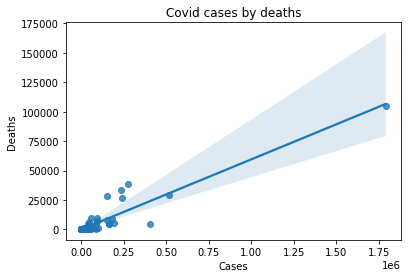

In [98]:
myPlotData = sns.regplot(x='total_cases', y='total_deaths', data=covidtotals)
myPlotData.set(xlabel="Cases", ylabel="Deaths", title="Covid cases by deaths")

In [99]:
covidtotals.loc[(covidtotals.total_cases>350000) & (covidtotals.total_deaths>20000)]

,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
iso_code,,,,,,,,,,,
BRA,2020-06-01,Brazil,514849,29314,"2,422.14",137.91,"212,559,409.00",25.04,33.50,"14,103.45",2.20
USA,2020-06-01,United States,1790191,104383,"5,408.39",315.35,"331,002,647.00",35.61,38.30,"54,225.45",2.77


In [100]:
covidtotals.loc[(covidtotals.total_cases>350000) & (covidtotals.total_deaths<20000)]

,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
iso_code,,,,,,,,,,,
RUS,2020-06-01,Russia,405843,4693,"2,780.99",32.16,"145,934,460.00",8.82,39.60,"24,765.95",8.05


[Text(0, 0.5, 'Deaths'),
 Text(0.5, 0, 'Cases'),
 Text(0.5, 1.0, 'Covid cases by deaths per million')]

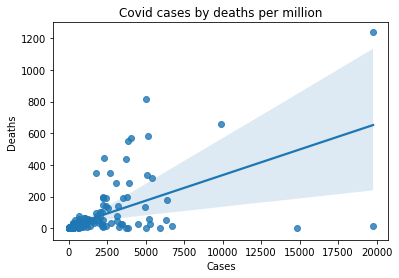

In [101]:
myPlotData = sns.regplot(x='total_cases_pm', y='total_deaths_pm', data=covidtotals)
myPlotData.set(xlabel="Cases", ylabel="Deaths", title="Covid cases by deaths per million")

### Additional Outlier Analysis

In [102]:
x_vars=['total_cases_pm', 'pop_density', 'median_age', 'gdp_per_capita']
covidtotals.loc[:, x_vars]

,total_cases_pm,pop_density,median_age,gdp_per_capita
iso_code,,,,
AFG,390.59,54.42,18.60,"1,803.99"
ALB,395.09,104.87,38.00,"11,803.43"
DZA,214.22,17.35,29.10,"13,913.84"
AND,"9,888.05",163.75,NaN,NaN
AGO,2.62,23.89,16.80,"5,819.49"
...,...,...,...,...
VNM,3.37,308.13,32.60,"6,171.88"
ESH,38.51,NaN,28.40,NaN
YEM,10.83,53.51,20.30,"1,479.15"


In [103]:
covidtotals.loc[:, x_vars].describe()

,total_cases_pm,pop_density,median_age,gdp_per_capita
count,210.00,198.00,186.00,182.00
mean,"1,355.36",362.87,30.63,"19,539.15"
std,"2,625.28","1,581.44",9.13,"19,862.35"
min,0.00,0.14,15.10,661.24
25%,92.54,37.42,22.25,"4,485.33"
50%,280.93,87.25,30.25,"13,183.08"
75%,"1,801.39",214.12,39.00,"28,556.53"
max,"19,771.35","19,347.50",48.20,"116,935.60"


In [104]:
covidtotals[x_vars].isna().sum()

total_cases_pm     0
pop_density       12
median_age        24
gdp_per_capita    28
dtype: int64

In [105]:
covidtotals = covidtotals.dropna(subset=["total_cases_pm", "pop_density", "median_age", "gdp_per_capita"])

In [106]:
covidtotals[x_vars].isna().sum()

total_cases_pm    0
pop_density       0
median_age        0
gdp_per_capita    0
dtype: int64

In [107]:
covidtotals.loc[:, x_vars].describe()

,total_cases_pm,pop_density,median_age,gdp_per_capita
count,175.00,175.00,175.00,175.00
mean,"1,134.02",247.15,30.54,"19,008.39"
std,"2,101.36",822.40,9.12,"19,673.39"
min,0.00,1.98,15.10,661.24
25%,67.45,36.07,22.30,"4,458.20"
50%,263.41,82.33,29.70,"12,951.84"
75%,"1,357.51",207.96,38.70,"27,467.15"
max,"19,753.15","7,915.73",48.20,"116,935.60"


***Notice the changes in values based on dropping rows with NaN***

## Outlier detection using pyod

https://pyod.readthedocs.io/en/latest/

In [50]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 147 kB 5.2 MB/s 
  Created wheel for pyod: filename=pyod-1.0.7-py3-none-any.whl size=181101 sha256=51eb68f72dd6a055f1bd463eefac890ccc96b90a0764a95bb5c2c98b37dbb6bf
  Stored in directory: /root/.cache/pip/wheels/f7/e2/c1/1c7fd8b261e72411f6509afb429c84532e40ddcd96074473f4
Successfully built pyod


In [51]:
from pyod.models.lof import LOF

In [110]:
X = covidtotals[["median_age", "total_cases_pm"]].to_numpy()
# X

In [53]:
detector = LOF()
detector.fit(X)

# Predict the outlier scores of the data
scores = detector.decision_scores_

# Find the outliers and inliers
outliers = np.where(scores > np.percentile(scores, 95))[0]
inliers = np.where(scores <= np.percentile(scores, 95))[0]

print(f'Outliers: {outliers}')
print()
print(f'Inliers: {inliers}')

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

Outliers: [  0   1  12  50  71  72  95 131 155]

Inliers: [  2   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174]


In [112]:
# X

In [54]:
X[0]

array([ 18.6  , 390.589])

In [55]:
X[1]

array([ 38.   , 395.093])

<Figure size 720x720 with 0 Axes>

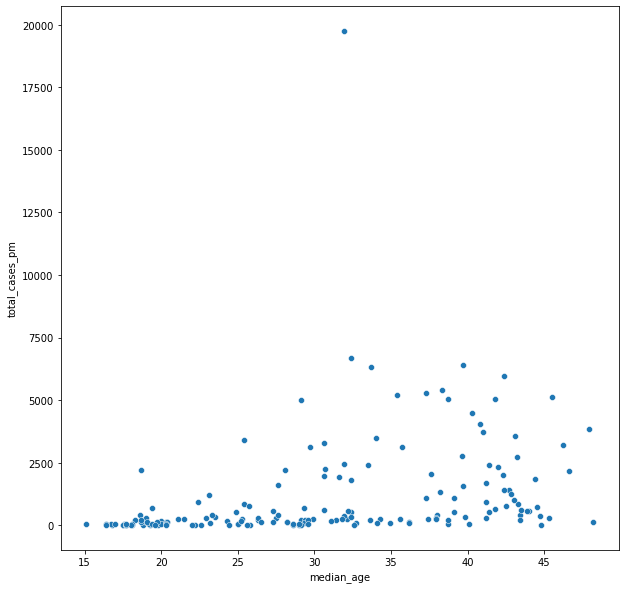

In [56]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = covidtotals, x = "median_age", y = "total_cases_pm")
plt.show()